In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
import re

In [2]:
import nltk
from nltk.stem.snowball import SnowballStemmer
#nltk.download()
stemmer = SnowballStemmer("english")

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [3]:
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=1)
pprint(list(newsgroups.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [4]:
print 'Elements number:', len(newsgroups.data)

Elements number: 18846


In [5]:
vectorizer = TfidfVectorizer(stop_words='english', use_idf=True,
                             max_df=0.8, max_features=200000, tokenizer=tokenize_and_stem)
%time data = vectorizer.fit_transform(newsgroups.data)

CPU times: user 2min 20s, sys: 2.01 s, total: 2min 22s
Wall time: 2min 22s


In [6]:
from sklearn.cluster import KMeans

num_clusters = len(list(newsgroups.target_names))
clust = KMeans(n_clusters = num_clusters, n_init = 1)
%time clust.fit(data)
pass

CPU times: user 45.3 s, sys: 928 ms, total: 46.2 s
Wall time: 12.7 s


In [7]:
from collections import defaultdict
d = defaultdict(int)
a = map(int, [x for x in range(20)])
for i in clust.labels_:
    d[i] += 1

print('Number of elements in each cluster')
pprint(dict(d))

Number of elements in each cluster
{0: 79,
 1: 718,
 2: 592,
 3: 2372,
 4: 530,
 5: 677,
 6: 743,
 7: 607,
 8: 1180,
 9: 408,
 10: 169,
 11: 411,
 12: 519,
 13: 221,
 14: 6943,
 15: 541,
 16: 265,
 17: 302,
 18: 608,
 19: 961}


Convert to 2d

In [8]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2)
clustering_data_2d = svd.fit_transform(data)
xs = clustering_data_2d[:,0]
ys = clustering_data_2d[:,1]

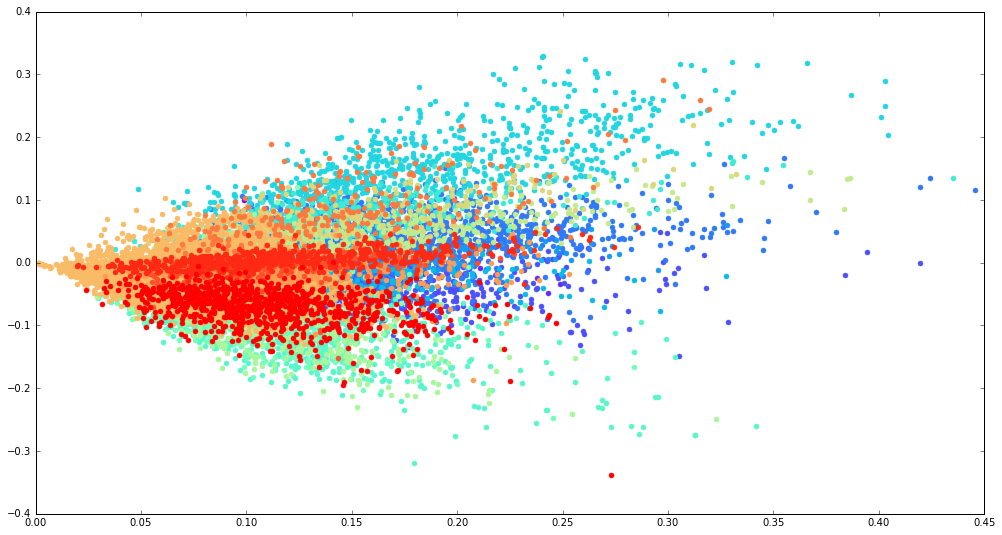

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

%matplotlib inline 

df = pd.DataFrame(dict(x=xs, y=ys, label=clust.labels_)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size

colors = mpl.cm.rainbow(np.linspace(0, 1, 20))
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle=' ', ms=10, color=colors[name])
   
    
plt.show() #show the plot